In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import csv
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import keras
from keras import models
from keras import layers

from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense
from keras.optimizers import Adam

import timeit
from sklearn.utils import shuffle

Using TensorFlow backend.


In [0]:
from google.colab import files
#files.upload() 

In [3]:
ls

 sample_data/  'songs (1).csv'  'songs (2).csv'   songs.csv


In [4]:
data = pd.read_csv('songs.csv')
data = data.drop(['filename'],axis = 1)
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,flatness,poly,chroma_cqt,chroma_cens,...,mfcc18,mfcc19,mfcc20,tonnetz1,tonnetz2,tonnetz3,tonnetz4,tonnetz5,tonnetz6,label
0,0.257259,0.09198,1195.411640,1481.284259,2234.878153,0.058871,0.017725,1.086251,0.555419,0.268175,...,-1.337586,-3.719717,-4.353154,0.020575,0.016943,0.088439,-0.026695,0.012183,-0.005494,blues
1,0.412501,0.09198,2171.221742,1954.383785,4237.132712,0.132802,0.000642,0.594293,0.513369,0.267898,...,-0.271427,-3.696092,-0.504041,-0.002745,0.008571,-0.042509,0.057754,0.005468,0.017238,blues
2,0.379428,0.09198,2148.786199,2204.574064,4673.663406,0.098812,0.005946,1.750953,0.594625,0.274696,...,0.464257,-1.909089,-3.128308,-0.010565,0.000952,0.003099,0.026811,-0.004230,0.006860,blues
3,0.340983,0.09198,1529.835316,2038.617579,3548.820207,0.056044,0.005735,1.223702,0.509443,0.267173,...,0.293875,-0.287431,0.531573,-0.020591,0.000802,0.031767,-0.016651,0.005038,0.005216,blues
4,0.356588,0.09198,2068.371125,2033.930047,4231.499413,0.104372,0.002294,0.675315,0.503215,0.261366,...,0.194597,0.842872,-3.416576,0.007437,0.018288,0.046516,0.011819,0.007859,-0.007299,blues


In [0]:
data = shuffle(data)

In [0]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [0]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [9]:
X_train.shape

(900, 37)

In [0]:

x_train = X_train.reshape((900, 1, 37))

In [11]:
x_train.shape

(900, 1, 37)

In [12]:
y_train.shape

(900,)

In [0]:
ytrain = y_train.reshape((900, 1, ))

In [14]:
ytrain.shape

(900, 1)

In [15]:
#prevent overfitting: https://stats.stackexchange.com/questions/204745/preventing-overfitting-of-lstm-on-small-dataset
#https://www.researchgate.net/post/In_neural_networks_model_which_number_of_hidden_units_to_select
#https://pdfs.semanticscholar.org/064f/1e85984b207c1eb3c53ac8b68037089b7a0b.pdf

model = Sequential()

model.add(LSTM(units=32, dropout=0.2, recurrent_dropout=0.1, return_sequences=True,input_shape=(1,37)))

model.add(LSTM(units=16, dropout=0.2, recurrent_dropout=0.1, return_sequences=False))

#model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dense(13, activation='relu'))

#model.add(Dense(16, activation='sigmoid'))

model.add(layers.Dense(units = 10, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model.compile(optimizer='RMSProp', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 32)             8960      
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 12,266
Trainable params: 12,266
Non-trainable params: 0
_________________________________________________________________


In [17]:

history = model.fit(x_train, ytrain,
                    epochs=30,
                    batch_size=15,
                    validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 810 samples, validate on 90 samples
Epoch 1/30
810/810 [==============================] - 2s 2ms/step - loss: 2.2718 - acc: 0.2407 - val_loss: 2.2377 - val_acc: 0.2889
Epoch 2/30
810/810 [==============================] - 0s 266us/step - loss: 2.1973 - acc: 0.3086 - val_loss: 2.1568 - val_acc: 0.2889
Epoch 3/30
810/810 [==============================] - 0s 258us/step - loss: 2.1066 - acc: 0.3272 - val_loss: 2.0751 - val_acc: 0.2889
Epoch 4/30
810/810 [==============================] - 0s 255us/step - loss: 2.0205 - acc: 0.3259 - val_loss: 2.0018 - val_acc: 0.3111
Epoch 5/30
810/810 [==============================] - 0s 258us/step - loss: 1.9352 - acc: 0.3358 - val_loss: 1.9364 - val_acc: 0.3000
Epoch 6/30
810/810 [==============================] - 0s 264us/step - loss: 1.8515 - acc: 0.3420 - val_loss: 1.8715 - val_acc: 0.3111
Epoch 7/30
810/810 [==============================] - 0s 263us/step - loss: 1.7731 - acc: 0.3753 - val_lo

In [0]:
x_test = X_test.reshape((100,1,37))

In [0]:
ytest = y_test.reshape((100,1))

In [20]:
test_loss, test_acc = model.evaluate(x_test,ytest)
print('test_acc: ',test_acc)

100/100 [==============================] - 0s 100us/step
test_acc:  0.67


In [0]:
from matplotlib import pyplot

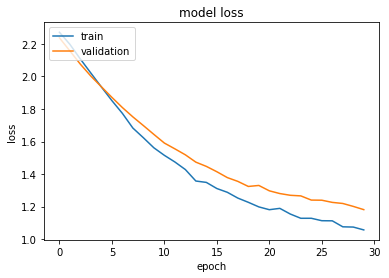

In [22]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

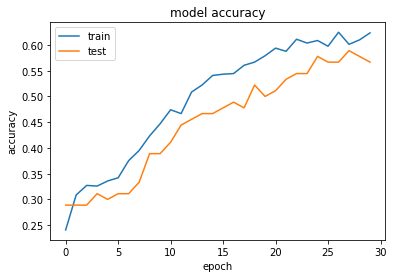

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()